In [73]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
import sys 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import pandas

In [69]:
dataset = pandas.read_csv('../dataset_norm.csv', delimiter=',').sort_values(by='move_type')

In [37]:
labels = dataset['move_type']

columns = [item for item in list(dataset.columns) if item!='move_type']
features = dataset[columns]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features.values, labels.values, test_size=0.33, random_state=42)

# K-Means clustering

In [39]:
n_clusters = 134
score = []
validation = []
for i in range(2,n_clusters):
    
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_train)
    score.append(kmeans.score(X_test, y_test))
    validation.append(kmeans.score(X_train, y_train))


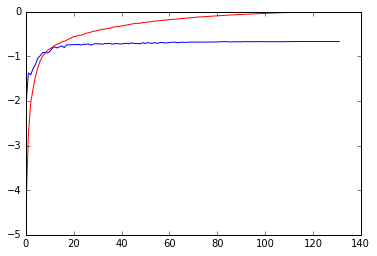

In [40]:
plt.plot(score)
plt.plot(validation, 'r')
plt.show()

In [65]:
kmeans = KMeans(n_clusters=10, random_state=0, max_iter=10000).fit(X_train)

In [66]:
kmeans.cluster_centers_.shape

(10, 41)

In [67]:
belong_to = kmeans.predict(features.values)
print(belong_to[:49])
print(belong_to[50:99])
print(belong_to[100:149])
print(belong_to[150:199])

[5 0 8 8 8 8 0 8 8 5 5 0 5 0 8 0 8 8 5 5 8 0 8 0 5 8 0 8 8 8 8 5 5 5 0 8 0
 5 8 8 5 8 8 8 8 8 8 5 0]
[1 7 1 7 9 1 1 3 3 3 1 1 3 1 3 7 3 7 3 1 7 1 1 7 1 7 1 3 1 1 1 3 9 3 9 1 1
 1 3 9 1 3 1 7 1 9 1 3 1]
[9 9 7 7 1 7 1 3 3 7 1 1 9 1 9 7 1 7 9 7 1 7 3 1 3 3 7 3 9 1 7 9 7 9 7 7 1
 7 7 3 9 9 1 3 9 9 7 7 7]
[2 2 2 2 2 2 6 2 2 2 2 2 2 2 5 2 2 2 6 2 6 2 2 6 6 2 2 5 6 2 2 2 2 2 2 6 2
 2 2 6 4 2 2 6 2 2 2 2 2]


In [12]:
def reconstruct(descriptors):
    """ reconstruct the image using the normalized descriptors and plot it
        Keyword arguments: 
         - descriptors : the normalized fourier descriptors
    """
    contour_reconstruct = np.fft.ifft(descriptors)
    contour_reconstruct = np.array(
        [contour_reconstruct.real, contour_reconstruct.imag])
    contour_reconstruct = np.transpose(contour_reconstruct)
    contour_reconstruct = np.expand_dims(contour_reconstruct, axis=1)
    # make positive
    if contour_reconstruct.min() < 0:
        contour_reconstruct -= contour_reconstruct.min()
    # normalization
    contour_reconstruct *= 800 / contour_reconstruct.max()
    # type cast to int32
    contour_reconstruct = contour_reconstruct.astype(np.int32, copy=False)
    black = np.zeros((800, 800), np.uint8)
    # draw and visualize
    cv2.drawContours(black, contour_reconstruct, -1, 255, thickness=-1)
    cv2.imshow("black", black)
    cv2.waitKey(10000)
    cv2.imwrite("reconstruct_result.jpg", black)
    cv2.destroyAllWindows()

In [32]:
img_nb = 60
complex_descriptors = []
for i in range(int(len(features.values[img_nb])/2)):
    complex_descriptors.append(complex(features.values[img_nb][2*i], features.values[img_nb][2*i+1]))
reconstruct(complex_descriptors)
labels[3]

'GO'

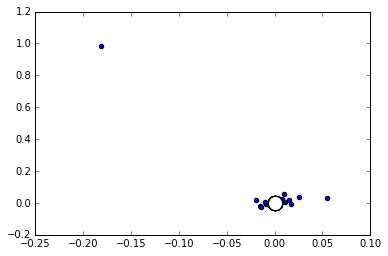

In [41]:
plt.scatter(X_test[7][3::2],X_test[7][2::2] )
plt.scatter(centers[1, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
plt.show()

# KNN clustering

In [80]:
knn_classifier = KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train ) 

In [81]:
knn_belong_to = knn_classifier.predict(features.values)

In [82]:
print(knn_belong_to[:49])
print(knn_belong_to[50:99])
print(knn_belong_to[100:149])
print(knn_belong_to[150:199])

['GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO'
 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO'
 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO' 'GO'
 'GO' 'GO' 'GO' 'GO']
['LEFT' 'LEFT' 'LEFT' 'LEFT' 'LEFT' 'LEFT' 'LEFT' 'LEFT' 'LEFT' 'LEFT'
 'LEFT' 'LEFT' 'LEFT' 'LEFT' 'LEFT' 'RIGHT' 'LEFT' 'LEFT' 'LEFT' 'LEFT'
 'LEFT' 'LEFT' 'LEFT' 'LEFT' 'LEFT' 'RIGHT' 'LEFT' 'LEFT' 'LEFT' 'LEFT'
 'LEFT' 'LEFT' 'RIGHT' 'LEFT' 'RIGHT' 'LEFT' 'LEFT' 'LEFT' 'LEFT' 'RIGHT'
 'LEFT' 'LEFT' 'LEFT' 'LEFT' 'LEFT' 'RIGHT' 'LEFT' 'LEFT' 'LEFT']
['RIGHT' 'RIGHT' 'RIGHT' 'RIGHT' 'RIGHT' 'RIGHT' 'RIGHT' 'LEFT' 'LEFT'
 'RIGHT' 'LEFT' 'LEFT' 'RIGHT' 'RIGHT' 'LEFT' 'RIGHT' 'LEFT' 'RIGHT'
 'RIGHT' 'RIGHT' 'LEFT' 'RIGHT' 'LEFT' 'RIGHT' 'LEFT' 'RIGHT' 'RIGHT'
 'RIGHT' 'LEFT' 'LEFT' 'RIGHT' 'RIGHT' 'RIGHT' 'RIGHT' 'RIGHT' 'LEFT'
 'RIGHT' 'RIGHT' 'RIGHT' 'LEFT' 'RIGHT' 'RIGHT' 'RIGHT' 'RIGHT' 'RIGHT'
 'LEFT' 'RIGHT' 'RIGHT' 'RIGHT']
['STOP' 'S